In [1]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Mengimpor dataset
data_set = pd.read_csv('Posisi_gaji.csv')
X = data_set.iloc[:, 1:2].values
y = data_set.iloc[:, 2].values # Ubah menjadi satu kolom saja

In [3]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

In [4]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

d:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

C:\Users\WINDOWS 11\AppData\Local\Temp\ipykernel_23304\558182403.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


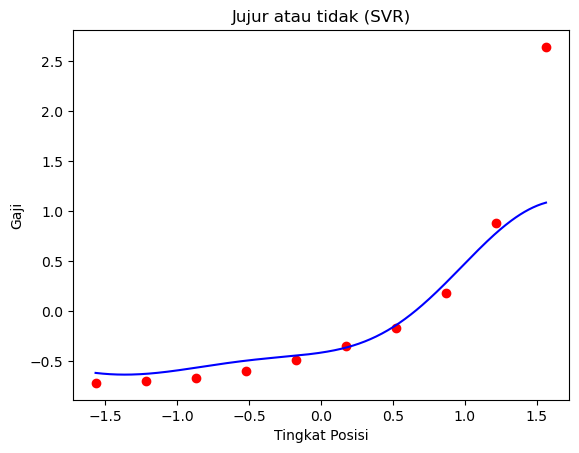

In [5]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat Posisi')
plt.ylabel('Gaji')
plt.show()

In [6]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang ingin diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])

# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)

# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)

# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

In [7]:
# Menampilkan hasil prediksi
print('Prediksi Gaji untuk tingkat posisi 6.5', gaji_prediksi[0])

Prediksi Gaji untuk tingkat posisi 6.5 [170370.0204065]


In [8]:
# evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score

y_actual = y
y_pred = regressor.predict(X)

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R2 Score
r2 = r2_score(y_actual, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.22299274095734414
Mean Squared Error: 0.24839989293792014
Root Mean Squared Error: 0.4983973243687411
R2 Score: 0.7516001070620798
